In [1]:
install.packages('randomForest')
require(randomForest)
library(rpart)
library(purrr)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Loading required package: randomForest

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [2]:
sd = sample(1:10000,1)
print(sd)

set.seed(sd)

# Test Set
ta <- round(rnorm(100, mean = 0, sd = 1),6)
tb <- round(rnorm(100, mean = 0, sd = 1),6)
tc <- round(rnorm(100, mean = 0, sd = 1),6)

test <- data.frame(cbind(ta,tb,tc))
colnames(test) <- c('A','B', 'C')

# Train Set
a <- round(rnorm(10000, mean = 0, sd = 1),6)
b <- round(rnorm(10000, mean = 0, sd = 1),6)
c <- round(rnorm(10000, mean = 0, sd = 1),6)

train <- data.frame(cbind(a,b,c))
colnames(train) <- c('A','B', 'C')

train$I <- train$A + train$B + train$C

eq <- I~A+B+C

[1] 947


In [3]:
set.seed(sd)
ntree = 50
model <- randomForest(eq,data=train,ntree=ntree,keep.inbag=T)

In [4]:
print(model)


Call:
 randomForest(formula = eq, data = train, ntree = ntree, keep.inbag = T) 
               Type of random forest: regression
                     Number of trees: 50
No. of variables tried at each split: 1

          Mean of squared residuals: 0.0474677
                    % Var explained: 98.4


In [5]:
## INBAG: n by ntree matrix be returned that keeps track of which samples are “in-bag” in which trees
## But not how many times, if sampling with replacement (Default replace = TRUE)
print(head(model$inbag)) ## 0 means OOB and 1-5 means which # of tree

  [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
1    0    0    1    2    1    3    1    1    1     0     3     1     0     0
2    3    2    0    1    1    1    0    4    0     2     0     1     2     1
3    2    0    0    2    0    2    1    1    1     2     2     2     3     0
4    1    0    2    0    1    0    2    1    0     1     2     1     0     2
5    1    1    0    0    1    0    2    0    1     0     0     2     1     1
6    0    0    0    1    1    1    2    1    0     2     3     1     1     0
  [,15] [,16] [,17] [,18] [,19] [,20] [,21] [,22] [,23] [,24] [,25] [,26] [,27]
1     1     0     2     2     0     1     0     2     2     0     2     0     1
2     0     1     5     3     1     2     2     0     1     1     1     1     2
3     0     3     2     1     1     0     1     0     0     1     0     2     3
4     2     1     0     3     0     0     0     2     1     2     0     0     0
5     1     2     0     1     0     1     0     1     1     2

In [6]:
outbag <- lapply(1:ntree, function(x) which(model[["inbag"]][ ,x] == 0)) ##keeping only the zeros

In [7]:
#print(outbag)

In [8]:
oobpred <- lapply(outbag, function(x) predict(model, train[x, ])) ## Out of bag predictions
#print(oobpred)

In [9]:
mae_function <- function(pred, actual) {
    mean(abs(pred-actual))
}

In [10]:
(oob_err <- map2_dbl(oobpred, outbag, function(x, y) mae_function(x, train[y, ]$I))) # Wi(obs) equation 5 Gajowniczek et.al (2020)
#print(oob_err) ## For each tree

[1] 0.06211135 0.06252054 0.06388646 0.06222518 0.06216014 0.06157231
 [7] 0.06194850 0.06207307 0.06030768 0.06304316 0.06214580 0.06255221
[13] 0.06279064 0.06253260 0.06163317 0.06180123 0.06243256 0.06142777
[19] 0.06215135 0.06307462 0.05960953 0.06229851 0.06054461 0.06126330
[25] 0.06377087 0.05982751 0.06243704 0.06463004 0.05966704 0.06242895
[31] 0.06394455 0.06057751 0.06371061 0.06331320 0.06250419 0.06274039
[37] 0.06209675 0.06252807 0.06203975 0.06150157 0.06266679 0.06084198
[43] 0.06382743 0.06193774 0.06488298 0.06281700 0.06134562 0.06206670
[49] 0.06247029 0.06314828

In [11]:
plot_function <- function(pred, actual) {
    plot(pred,actual)
    lines(actual,actual)
}

In [12]:
#plots <- map2(oobpred, outbag, function(x, y) plot_function(x, train[y, ]$I))
## You can see the pathology here as well
## Can you used to get correction - Work in Progress

In [13]:
## Predicting Test set responses
pred <- predict(model, test, type="response", predict.all=TRUE)
print(head(pred$individual)) #prediction from each tree ## pred$aggregate give simple average prediction 

         [,1]       [,2]       [,3]       [,4]       [,5]        [,6]
1  0.46923000 -0.4136107  0.5067610  0.3917136  0.6045950 -0.74924100
2 -0.74641050 -1.8389480 -0.2080950 -1.9953190 -1.4916610 -1.61214100
3  0.48230720  0.2033610  0.0609660  0.3325790  0.1519045  1.23167400
4 -1.78346650 -1.4520840 -1.4151376 -0.8940885 -1.4520840 -1.78520000
5 -1.43767575 -1.4264670 -1.0201093 -1.3164568 -0.9809328 -1.33870600
6  0.02012325  0.0789010  0.4175975  0.0654970  0.0937822  0.08022867
        [,7]       [,8]       [,9]      [,10]      [,11]      [,12]      [,13]
1  0.6262240  0.6262240  0.6262240  0.3872980  1.1034802  0.1932947  0.2056530
2 -2.0008375 -1.2139550 -2.6976460 -1.5964865 -1.9766800 -2.5938880 -1.3201324
3  0.5798510 -0.1086517  0.2322810 -0.1374038  0.6302404 -0.6972747  0.1742390
4 -1.4322092 -1.4263690 -1.0093874 -1.2384857 -1.4114170 -1.4998700 -2.0238537
5 -1.0228640 -0.9539130 -1.3279482 -1.2973770 -1.2099687 -1.4324240 -0.9294438
6  0.0478015  0.2536637 -0.4068296  

In [14]:
## If I rank the tree based on MAE of OOB error for each tree, then I can use equation 9 of Gajowniczek et.al (2020) to calculate weights
Rank <- as.vector(rank(oob_err))
Tree <- c(1:ntree)
rankorder <- as.data.frame(cbind(Tree,Rank))

In [15]:
rankorder$Nominator <- (ntree - rankorder$Rank + 1)^2 # equation 9
#print(rankorder)

In [16]:
sum = sum(rankorder$Nominator)
print(sum)

[1] 42925


In [17]:
normalize <- function(x) {
    return (3*((x - min(x)) / (max(x) - min(x))))
}

In [18]:
rankorder$TreeWts <- (rankorder$Nominator)/sum(rankorder$Nominator) # equation 9 and Table 3
rankorder$TreeWts <- normalize(rankorder$TreeWts)
print(rankorder)

   Tree Rank Nominator     TreeWts
1     1   21       900 1.079231693
2     2   32       361 0.432172869
3     3   47        16 0.018007203
4     4   25       676 0.810324130
5     5   24       729 0.873949580
6     6   12      1521 1.824729892
7     7   16      1225 1.469387755
8     8   19      1024 1.228091236
9     9    4      2209 2.650660264
10   10   40       121 0.144057623
11   11   22       841 1.008403361
12   12   35       256 0.306122449
13   13   38       169 0.201680672
14   14   34       289 0.345738295
15   15   13      1444 1.732292917
16   16   14      1369 1.642256903
17   17   28       529 0.633853541
18   18   10      1681 2.016806723
19   19   23       784 0.939975990
20   20   41       100 0.118847539
21   21    1      2500 3.000000000
22   22   26       625 0.749099640
23   23    5      2116 2.539015606
24   24    8      1849 2.218487395
25   25   45        36 0.042016807
26   26    3      2304 2.764705882
27   27   29       484 0.579831933
28   28   49        

In [19]:
print(pred$individual[1,])

 [1]  0.46923000 -0.41361067  0.50676100  0.39171360  0.60459500 -0.74924100
 [7]  0.62622400  0.62622400  0.62622400  0.38729800  1.10348020  0.19329475
[13]  0.20565300  0.62622400  0.58490550  0.33358900  0.58662400  1.78016900
[19]  0.78813400  0.62622400  0.59553640  0.63064175  0.40155580  0.12303250
[25]  0.44400220  0.87838950  0.61900600 -0.14359900  0.62622400  0.45835700
[31]  1.88294280  1.25510167 -0.06601240  0.59322400  0.29795825  1.78016900
[37]  0.35326480  0.61099160  0.60292733  0.57672400  0.43673350  1.78016900
[43]  0.62402650  0.23602725  0.64207440 -0.01932933  0.73416400  0.83394000
[49]  0.57502520  0.62622400


In [20]:
predictions <- vector()
for (i in 1:100){
    wtpredsum = 0
    for (k in 1:ntree){
        wtpred <- pred$individual[i,k] * rankorder$TreeWts[k]
        wtpredsum = wtpredsum + wtpred
    }
    predictions[i] <- wtpredsum/ntree ## equation 3
}

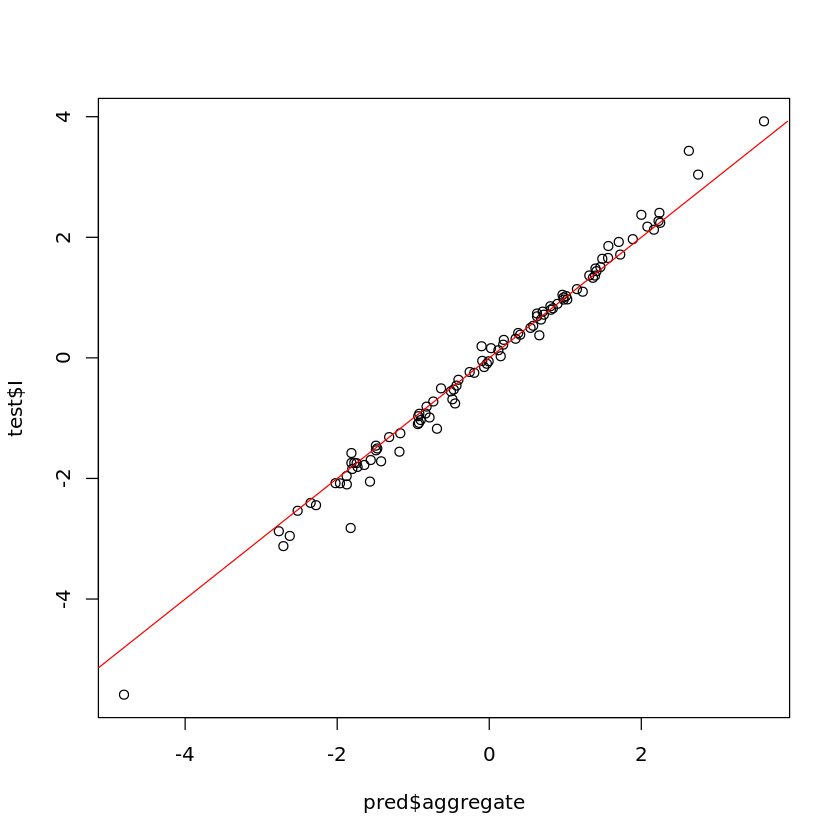

In [21]:
test$I <- test$A + test$B + test$C
plot(pred$aggregate,test$I)
lines(test$I,test$I, col= "red")

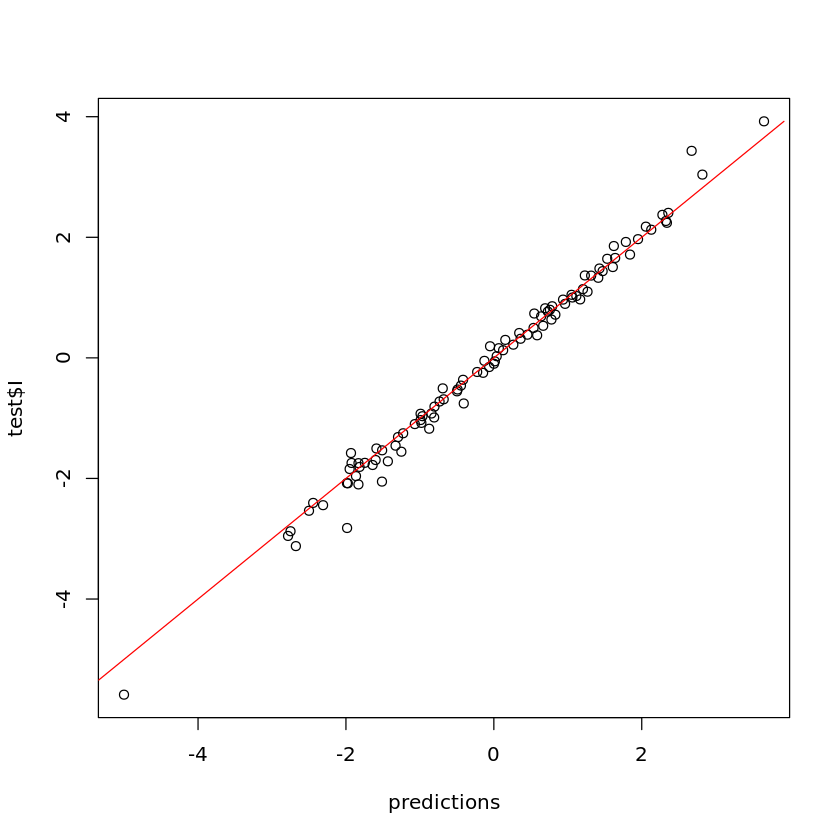

In [22]:
plot(predictions,test$I)
lines(test$I,test$I, col= "red")

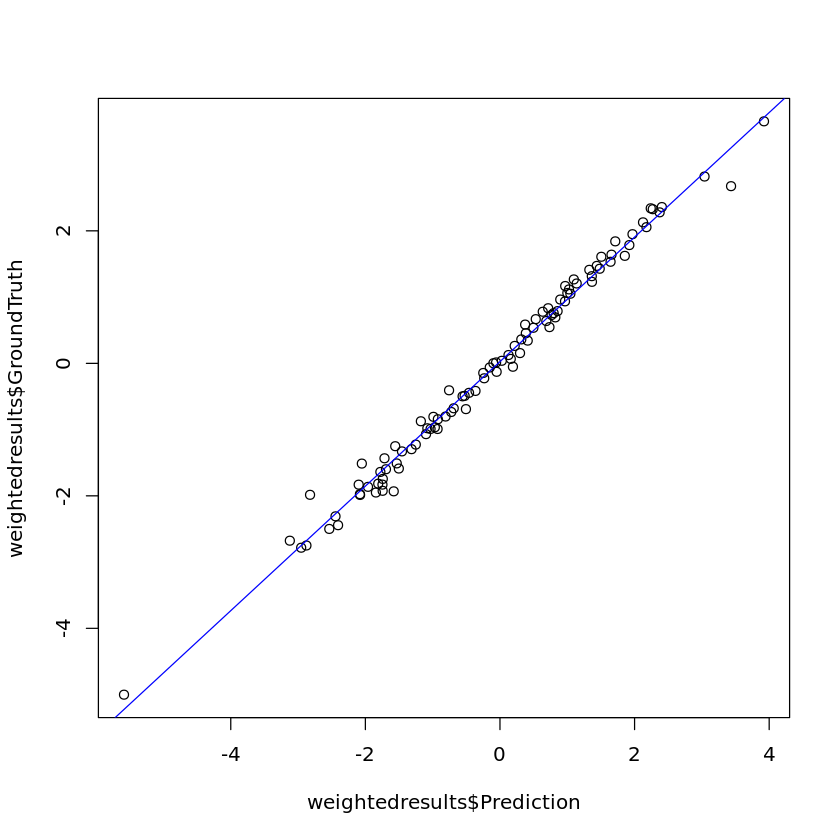

In [23]:
## Plotting with regression line (in red) instead
weightedresults<-as.data.frame(cbind(predictions,test$I))
colnames(weightedresults)<- c("GroundTruth", "Prediction")
reg1 <- lm(GroundTruth~Prediction, data=weightedresults)
plot(weightedresults$Prediction,weightedresults$GroundTruth)
abline(reg1, col="blue")

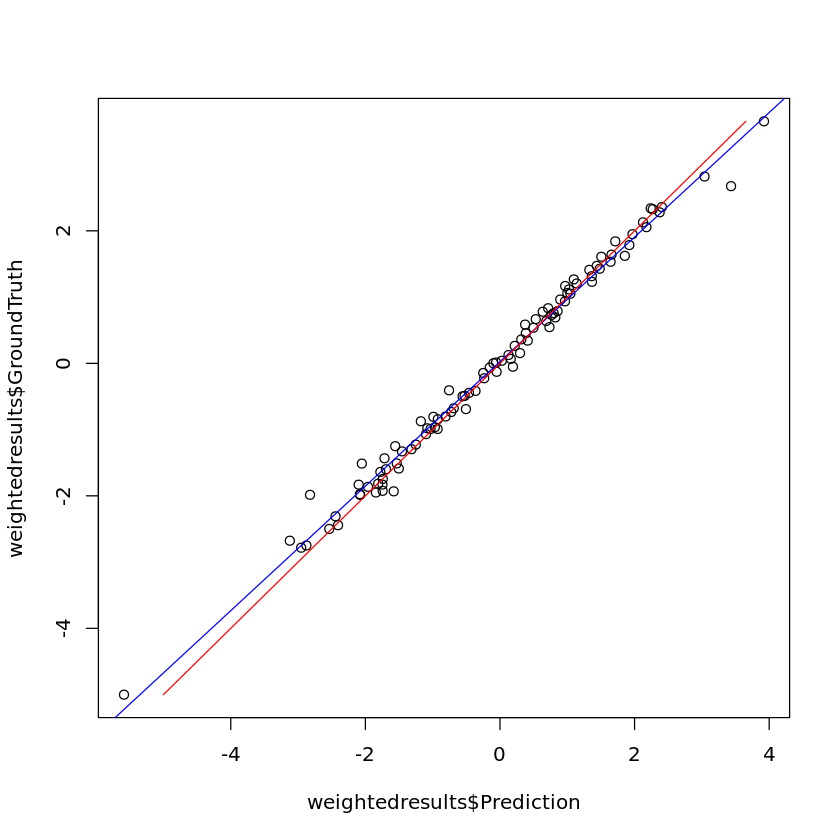

In [24]:
plot(weightedresults$Prediction,weightedresults$GroundTruth)
abline(reg1, col="blue")
lines(weightedresults$GroundTruth,weightedresults$GroundTruth, col= "red")